In [788]:
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [789]:
file_one = "Files/1_county_level_confirmed_cases.csv"

In [790]:
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_one_df.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-10-22 02:24:33 UTC,county,Alabama,Autauga,"Autauga, Alabama, US","1,001.00",32.54,-86.64,Medium metro,"55,200.00",2021,"3,661.23",30,54.35
1,2020-10-22 02:24:33 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US","1,003.00",30.73,-87.72,Small metro,"208,107.00",6443,"3,096.00",69,33.16
2,2020-10-22 02:24:33 UTC,county,Alabama,Barbour,"Barbour, Alabama, US","1,005.00",31.87,-85.39,Non-core,"25,782.00",996,"3,863.16",9,34.91
3,2020-10-22 02:24:33 UTC,county,Alabama,Bibb,"Bibb, Alabama, US","1,007.00",33.00,-87.13,Large fringe metro,"22,527.00",801,"3,555.73",14,62.15
4,2020-10-22 02:24:33 UTC,county,Alabama,Blount,"Blount, Alabama, US","1,009.00",33.98,-86.57,Large fringe metro,"57,645.00",1873,"3,249.20",25,43.37


In [791]:
# first edit to file one

clean_file_one_df = pd.DataFrame(file_one_df, columns= ['state','county_name','total_population','confirmed', 'deaths'])#, index = 1["CO"])
clean_file_one_df.head()

,state,county_name,total_population,confirmed,deaths
0,Alabama,Autauga,"55,200.00",2021,30
1,Alabama,Baldwin,"208,107.00",6443,69
2,Alabama,Barbour,"25,782.00",996,9
3,Alabama,Bibb,"22,527.00",801,14
4,Alabama,Blount,"57,645.00",1873,25


In [792]:
#add new row to help with future "join" of two dataframes #(second data frame has one more row than the first)

new_row = pd.DataFrame({'state':'', 'county_name':'', 'total_population':'', 
                        'confirmed':'', 'deaths':''}, index =[0])
new_row_df = pd.concat([new_row, clean_file_one_df[:]]).reset_index(drop = True) 
new_row_df.head()

,state,county_name,total_population,confirmed,deaths
0,,,,,
1,Alabama,Autauga,"55,200.00",2021,30
2,Alabama,Baldwin,"208,107.00",6443,69
3,Alabama,Barbour,"25,782.00",996,9
4,Alabama,Bibb,"22,527.00",801,14


In [800]:
total_pop = file_one_df.groupby(["state"]).sum()['total_population']
total_pop_df = pd.DataFrame(total_pop, columns=['total_population'])

total_pop_df.head()

,total_population
state,
Alabama,"4,864,680.00"
Alaska,"736,384.00"
Arizona,"6,946,685.00"
Arkansas,"2,990,671.00"
California,"39,148,760.00"


In [801]:
# list from csv for each state CONFIRMED

confirmed = file_one_df.groupby(["state"]).sum()['confirmed']
con_df = pd.DataFrame(confirmed,columns=['confirmed'])
con_df.head()

,confirmed
state,
Alabama,175674
Alaska,11602
Arizona,233912
Arkansas,101596
California,886939


In [802]:
comb_totpop_con_df = total_pop_df.join(confirmed_df, lsuffix="total_popualtion") 
comb_totpop_con_df.head()

,total_population,confirmed
state,,
Alabama,"4,864,680.00",175674
Alaska,"736,384.00",11602
Arizona,"6,946,685.00",233912
Arkansas,"2,990,671.00",101596
California,"39,148,760.00",886939


In [803]:
# list from csv for each state DEATHS

deaths = file_one_df.groupby(["state"]).sum()['deaths']
deaths_df = pd.DataFrame(deaths,columns=['deaths'])
deaths_df.head()

,deaths
state,
Alabama,2828
Alaska,68
Arizona,5854
Arkansas,1751
California,17170


In [804]:
# join two dataframes for sum of each state

comb_con_deaths_df = comb_totpop_con_df.join(deaths_df, lsuffix="confirmed") 
comb_con_deaths_df.head()

,total_population,confirmed,deaths
state,,,
Alabama,"4,864,680.00",175674,2828
Alaska,"736,384.00",11602,68
Arizona,"6,946,685.00",233912,5854
Arkansas,"2,990,671.00",101596,1751
California,"39,148,760.00",886939,17170


In [805]:
# make dataframe for Low Access Population

low_access_store_state = df1.groupby(["State"]).sum()["LACCESS_POP15"]
low_access_store_state_df = pd.DataFrame(low_access_store_state,columns=['LACCESS_POP15'])
rename_low_access_df = low_access_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_low_access_df.head()

,LACCESS_POP15
State,
Alaska,"223,550.11"
Alabama,"962,910.89"
Arkansas,"587,921.07"
Arizona,"1,254,357.80"
California,"4,323,349.51"


In [806]:
# join confirmed/deaths and low access

comb_condeaths_laccess_df = comb_con_deaths_df.join(rename_low_access_df, lsuffix="deaths") 

# rename column LACCESS_POP15

renamed_comb_condeaths_laccess_df = comb_condeaths_laccess_df.rename(columns={"LACCESS_POP15": "Low Access to Store"})
renamed_comb_condeaths_laccess_df.head()

,total_population,confirmed,deaths,Low Access to Store
state,,,,
Alabama,"4,864,680.00",175674,2828,"962,910.89"
Alaska,"736,384.00",11602,68,"223,550.11"
Arizona,"6,946,685.00",233912,5854,"1,254,357.80"
Arkansas,"2,990,671.00",101596,1751,"587,921.07"
California,"39,148,760.00",886939,17170,"4,323,349.51"


In [807]:
# make dataframe for Low Access Low Income Population
low_access_lowi_store_state = df1.groupby(["State"]).sum()["LACCESS_LOWI15"]
low_access_lowi_store_state_df = pd.DataFrame(low_access_lowi_store_state,columns=['LACCESS_LOWI15'])
rename_low_lowi_access_df = low_access_lowi_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_low_lowi_access_df.head()

,LACCESS_LOWI15
State,
Alaska,"64,994.54"
Alabama,"378,623.20"
Arkansas,"254,969.90"
Arizona,"482,198.71"
California,"1,225,949.44"


In [808]:
# join confirmed/deaths and low access

comb_condeaths_laccesslowi_df = renamed_comb_condeaths_laccess_df.join(rename_low_lowi_access_df, lsuffix="Low Access Store") 

# rename column LACCESS_LOWI15

renamed_comb_condeaths_laccesslowi_df = comb_condeaths_laccesslowi_df.rename(columns={"LACCESS_LOWI15": "Low Access Low Income to Store"})
renamed_comb_condeaths_laccesslowi_df.head()

,total_population,confirmed,deaths,Low Access to Store,Low Access Low Income to Store
state,,,,,
Alabama,"4,864,680.00",175674,2828,"962,910.89","378,623.20"
Alaska,"736,384.00",11602,68,"223,550.11","64,994.54"
Arizona,"6,946,685.00",233912,5854,"1,254,357.80","482,198.71"
Arkansas,"2,990,671.00",101596,1751,"587,921.07","254,969.90"
California,"39,148,760.00",886939,17170,"4,323,349.51","1,225,949.44"


In [809]:
# make dataframe for Low Access Low Income Population
conv_store_state = renamed_df_STORES.groupby(["State"]).sum()["# of Convenience Stores"]
conv_store_state_df = pd.DataFrame(conv_store_state,columns=['# of Convenience Stores'])
conv_store_state_df["% Convenience Stores"]=""
rename_conv_store_state_df = conv_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_conv_store_state_df.head()

,# of Convenience Stores,% Convenience Stores
State,,
Alaska,173,
Alabama,3237,
Arkansas,1512,
Arizona,1903,
California,8949,


In [810]:
# make dataframe for Low Access Low Income Population
grocery_store_state = renamed_df_STORES.groupby(["State"]).sum()["# of Grocery Stores"]
grocery_store_state_df = pd.DataFrame(grocery_store_state,columns=['# of Grocery Stores'])
grocery_store_state_df["% Grocery Stores"]=""
rename_grocery_store_state_df = grocery_store_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_grocery_store_state_df.head()

,# of Grocery Stores,% Grocery Stores
State,,
Alaska,215,
Alabama,757,
Arkansas,480,
Arizona,786,
California,7874,


In [811]:
# join dataframes with empty columns
comb_STORES_state_df = rename_grocery_store_state_df.join(rename_conv_store_state_df, lsuffix="% Grocery Stores")

#divide to find %'s 
comb_STORES_state_df["% Grocery Stores"]=comb_STORES_state_df['# of Grocery Stores']/(comb_STORES_state_df['# of Grocery Stores'] + comb_STORES_state_df['# of Convenience Stores'])
comb_STORES_state_df["% Convenience Stores"]=comb_STORES_state_df['# of Convenience Stores']/(comb_STORES_state_df['# of Grocery Stores'] + comb_STORES_state_df['# of Convenience Stores'])

comb_STORES_state_df.head()


,# of Grocery Stores,% Grocery Stores,# of Convenience Stores,% Convenience Stores
State,,,,
Alaska,215,0.55,173,0.45
Alabama,757,0.19,3237,0.81
Arkansas,480,0.24,1512,0.76
Arizona,786,0.29,1903,0.71
California,7874,0.47,8949,0.53


In [812]:
# join confirmed/deaths and store info

comb_condeaths_stores_df = renamed_comb_condeaths_laccesslowi_df.join(comb_STORES_state_df, lsuffix="Low Access Low Income to Store") 
comb_condeaths_stores_df.head()

,total_population,confirmed,deaths,Low Access to Store,Low Access Low Income to Store,# of Grocery Stores,% Grocery Stores,# of Convenience Stores,% Convenience Stores
state,,,,,,,,,
Alabama,"4,864,680.00",175674,2828,"962,910.89","378,623.20",757.00,0.19,"3,237.00",0.81
Alaska,"736,384.00",11602,68,"223,550.11","64,994.54",215.00,0.55,173.00,0.45
Arizona,"6,946,685.00",233912,5854,"1,254,357.80","482,198.71",786.00,0.29,"1,903.00",0.71
Arkansas,"2,990,671.00",101596,1751,"587,921.07","254,969.90",480.00,0.24,"1,512.00",0.76
California,"39,148,760.00",886939,17170,"4,323,349.51","1,225,949.44","7,874.00",0.47,"8,949.00",0.53


In [813]:
# make dataframe for Low Access obesity Population
obesity_state = df1_HEALTH.groupby(["State"]).mean()["PCT_OBESE_ADULTS17"]
obesity_state_df = pd.DataFrame(obesity_state,columns=['PCT_OBESE_ADULTS17'])
obesity_state_df["Total Obese Adults Per State"]=""
rename_obesity_state_df = obesity_state_df.rename({"AK":"Alaska","AL":"Alabama","AR":"Arkansas","AZ":"Arizona","CA":"California","CO":"Colorado","CT":"Connecticut","DC":"District of Columbia","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota","MO":"Missouri","MS":"Mississippi","MT":"Montana","NV":"Nevada","NC":"North Carolina","ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming","NM":"New Mexico","NJ":"New Jersey","RI":"Rhode Island"})

rename_obesity_state_df.head()

,PCT_OBESE_ADULTS17,Total Obese Adults Per State
State,,
Alaska,34.20,
Alabama,36.30,
Arkansas,35.00,
Arizona,29.50,
California,25.10,


In [814]:
# join confirmed/deaths and obesity rates

comb_condeaths_all_df = rename_obesity_state_df.join(comb_condeaths_stores_df,lsuffix="% Convenience Stores")

# create two new columns for % low access to store (["Low Access to Store"]/["total_population"]) & 

comb_condeaths_all_df["% of Low Access to Store (Total Population)"]=''
comb_condeaths_all_df["% of Low Access Low Income to Store (Total Population)"]=''

# move rows to match colorado df

comb_condeaths_all_df = comb_condeaths_all_df[['total_population','confirmed', 'deaths', 'Low Access to Store','% of Low Access to Store (Total Population)', 'Low Access Low Income to Store','% of Low Access Low Income to Store (Total Population)',"# of Grocery Stores","% Grocery Stores","# of Convenience Stores","% Convenience Stores","Total Obese Adults Per State","PCT_OBESE_ADULTS17"]]

# fill in empty columns with equations of big data set

comb_condeaths_all_df["Total Obese Adults Per State"]=comb_condeaths_all_df['PCT_OBESE_ADULTS17']*(comb_condeaths_all_df['total_population']/100)
comb_condeaths_all_df["% of Low Access to Store (Total Population)"]=comb_condeaths_all_df["Low Access to Store"]/comb_condeaths_all_df["total_population"]
comb_condeaths_all_df["% of Low Access Low Income to Store (Total Population)"]=comb_condeaths_all_df["Low Access Low Income to Store"]/comb_condeaths_all_df["total_population"]

# rename columns

comb_condeaths_all_df = comb_condeaths_all_df.rename(columns={"total_population":"Total Population"})
comb_condeaths_all_df = comb_condeaths_all_df.rename(columns={"confirmed":"Confirmed"})
comb_condeaths_all_df = comb_condeaths_all_df.rename(columns={"deaths":"Deaths"})
comb_condeaths_all_df = comb_condeaths_all_df.rename(columns={"PCT_OBESE_ADULTS17":"% of Obese Adults"})
comb_condeaths_all_df.head()

,Total Population,Confirmed,Deaths,Low Access to Store,% of Low Access to Store (Total Population),Low Access Low Income to Store,% of Low Access Low Income to Store (Total Population),# of Grocery Stores,% Grocery Stores,# of Convenience Stores,% Convenience Stores,Total Obese Adults Per State,% of Obese Adults
State,,,,,,,,,,,,,
Alaska,"736,384.00",11602,68,"223,550.11",0.30,"64,994.54",0.09,215.00,0.55,173.00,0.45,"251,843.33",34.20
Alabama,"4,864,680.00",175674,2828,"962,910.89",0.20,"378,623.20",0.08,757.00,0.19,"3,237.00",0.81,"1,765,878.84",36.30
Arkansas,"2,990,671.00",101596,1751,"587,921.07",0.20,"254,969.90",0.09,480.00,0.24,"1,512.00",0.76,"1,046,734.85",35.00
Arizona,"6,946,685.00",233912,5854,"1,254,357.80",0.18,"482,198.71",0.07,786.00,0.29,"1,903.00",0.71,"2,049,272.08",29.50
California,"39,148,760.00",886939,17170,"4,323,349.51",0.11,"1,225,949.44",0.03,"7,874.00",0.47,"8,949.00",0.53,"9,826,338.76",25.10


In [815]:
def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")

r-squared: 0.05


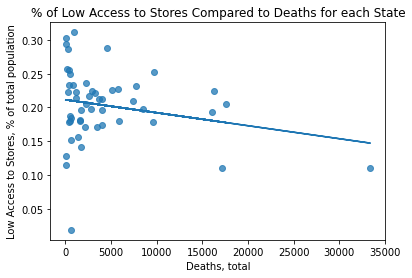

In [816]:
#low access deaths

scatter_deaths_perclowacc = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['% of Low Access to Store (Total Population)'], '% of Low Access to Stores Compared to Deaths for each State', 'Deaths, total', 'Low Access to Stores, % of total population', 0.75)

r-squared: 0.049


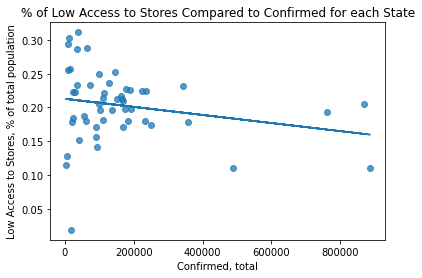

In [817]:
#low access confirmed

scatter_confirmed_perclowacc1 = create_scatter(comb_condeaths_all_df['Confirmed'], comb_condeaths_all_df['% of Low Access to Store (Total Population)'], '% of Low Access to Stores Compared to Confirmed for each State', 'Confirmed, total', 'Low Access to Stores, % of total population', 0.75)

r-squared: 0.073


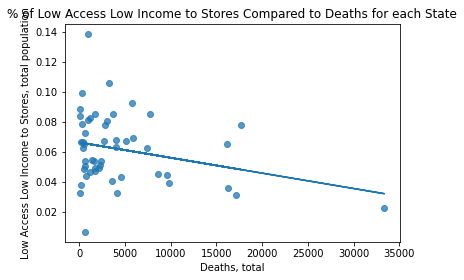

In [818]:
#low access low income deaths

scatter_deaths_perclowacc1 = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['% of Low Access Low Income to Store (Total Population)'], '% of Low Access Low Income to Stores Compared to Deaths for each State', 'Deaths, total', 'Low Access Low Income to Stores, total population', 0.75)

r-squared: 0.604


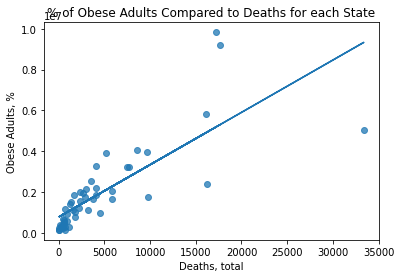

In [819]:
#low access low income confirmed

scatter_deaths_obese = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['Total Obese Adults Per State'], '% of Obese Adults Compared to Deaths for each State', 'Deaths, total', 'Obese Adults, %', 0.75)

r-squared: 0.604


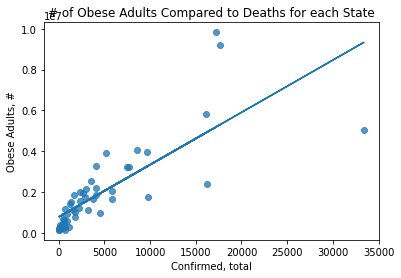

In [820]:
# total # obese adults compared to deaths

scatter_deaths_obese = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['Total Obese Adults Per State'], '# of Obese Adults Compared to Deaths for each State', 'Confirmed, total', 'Obese Adults, #', 0.75)

r-squared: 0.917


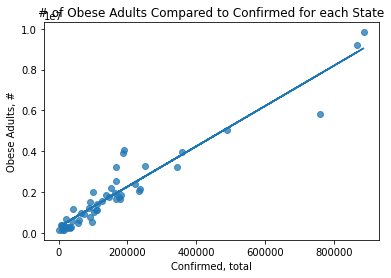

In [821]:
# total # obese adults compared to confirmed

scatter_confirmed_obese = create_scatter(comb_condeaths_all_df['Confirmed'], comb_condeaths_all_df['Total Obese Adults Per State'], '# of Obese Adults Compared to Confirmed for each State', 'Confirmed, total', 'Obese Adults, #', 0.75)

r-squared: 0.564


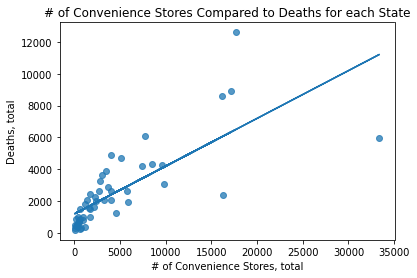

In [822]:
# total # obese adults compared to deaths

scatter_deaths_conv = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['# of Convenience Stores'], '# of Convenience Stores Compared to Deaths for each State', '# of Convenience Stores, total', 'Deaths, total', 0.75)

r-squared: 0.895


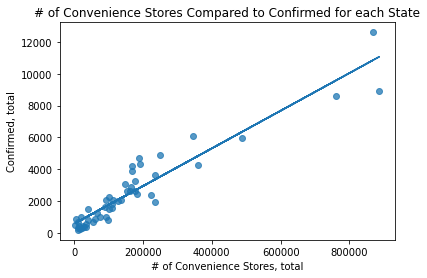

In [823]:
# convenience stores vs confirmed

scatter_confirmed_conv = create_scatter(comb_condeaths_all_df['Confirmed'], comb_condeaths_all_df['# of Convenience Stores'], '# of Convenience Stores Compared to Confirmed for each State', '# of Convenience Stores, total', 'Confirmed, total', 0.75)

r-squared: 0.564


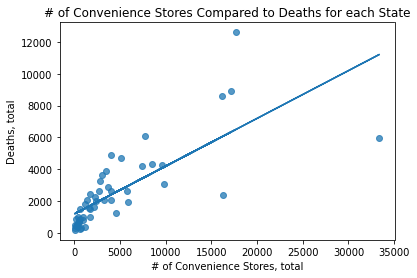

In [824]:
# convenience stores vs confirmed

scatter_confirmed_conv = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['# of Convenience Stores'], '# of Convenience Stores Compared to Deaths for each State', '# of Convenience Stores, total', 'Deaths, total', 0.75)

r-squared: 0.852


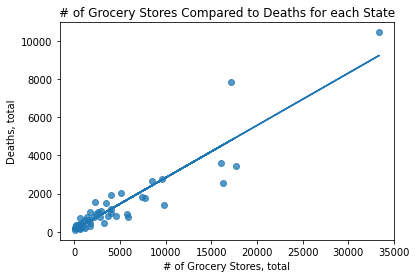

In [825]:
# grocery stores vs deaths

scatter_deaths_grocery = create_scatter(comb_condeaths_all_df['Deaths'], comb_condeaths_all_df['# of Grocery Stores'], '# of Grocery Stores Compared to Deaths for each State', '# of Grocery Stores, total', 'Deaths, total', 0.75)

r-squared: 0.593


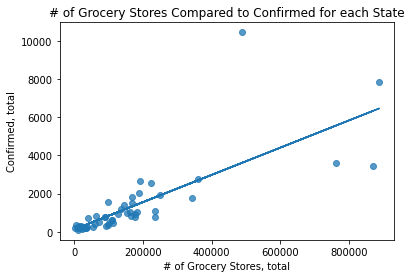

In [826]:
# confirmed vs grocery stores

scatter_confirmed_grocery = create_scatter(comb_condeaths_all_df['Confirmed'], comb_condeaths_all_df['# of Grocery Stores'], '# of Grocery Stores Compared to Confirmed for each State', '# of Grocery Stores, total', 'Confirmed, total', 0.75)

In [827]:
# Question 1: How does each variable related to food deserts or obesity nationwide?
# Conclusion: Each variable tends to have a positive correlation to the confirmed cases and deaths across the USA. As well, each scatter plot comes with a relatively high Rsquared value which signifies a high correlation between the two variables. This tells me that overall health is extremely important in terms of how deadly COVID-19 is. Poor health has been positively linked to a higher death rate by scientists so this wasn't extremely shocking to me. What did interest me initially was the extremely high correlation between the amount of convenience stores and the number of confirmed cases (r-squared of 0.895). I later realized this might have to do more with the fact that a greater number of convenience stores means a higher population in said state, meaning a greater percentage of confirmed and deaths. 
# What's next?: Due to the last realization that more convenience stores = more confirmed cases / deaths due to population size or density, I decided to look at each variable in per capita to see if this would result in less of a bias towards a state's population.

In [828]:
renew_comb_condeaths_all_df = comb_condeaths_all_df.drop(columns=["Total Population","Confirmed","Deaths","% of Low Access to Store (Total Population)","% of Low Access Low Income to Store (Total Population)","% Grocery Stores","% Convenience Stores","% of Obese Adults"])
renew_comb_condeaths_all_df["Low Access to Store (Per Capita)"]=""
renew_comb_condeaths_all_df["Low Access Low Income to Store (Per Capita)"]=""
renew_comb_condeaths_all_df["# of Grocery Stores (Per Capita)"]=""
renew_comb_condeaths_all_df["# of Convenience Stores (Per Capita)"]=""
renew_comb_condeaths_all_df["Obese Adults (Per Capita)"]=""

renew_comb_condeaths_all_df = renew_comb_condeaths_all_df[['Low Access to Store',"Low Access to Store (Per Capita)","Low Access Low Income to Store","Low Access Low Income to Store (Per Capita)","# of Grocery Stores","# of Grocery Stores (Per Capita)","# of Convenience Stores","# of Convenience Stores (Per Capita)","Total Obese Adults Per State","Obese Adults (Per Capita)"]]
renew_comb_condeaths_all_df.head()

,Low Access to Store,Low Access to Store (Per Capita),Low Access Low Income to Store,Low Access Low Income to Store (Per Capita),# of Grocery Stores,# of Grocery Stores (Per Capita),# of Convenience Stores,# of Convenience Stores (Per Capita),Total Obese Adults Per State,Obese Adults (Per Capita)
State,,,,,,,,,,
Alaska,"223,550.11",,"64,994.54",,215.00,,173.00,,"251,843.33",
Alabama,"962,910.89",,"378,623.20",,757.00,,"3,237.00",,"1,765,878.84",
Arkansas,"587,921.07",,"254,969.90",,480.00,,"1,512.00",,"1,046,734.85",
Arizona,"1,254,357.80",,"482,198.71",,786.00,,"1,903.00",,"2,049,272.08",
California,"4,323,349.51",,"1,225,949.44",,"7,874.00",,"8,949.00",,"9,826,338.76",


In [829]:
pc_file_one_df = pd.DataFrame(file_one_df, columns= ['state','county_name','total_population','confirmed_per_100000', 'deaths_per_100000'])
pc_file_one_df.head()

,state,county_name,total_population,confirmed_per_100000,deaths_per_100000
0,Alabama,Autauga,"55,200.00","3,661.23",54.35
1,Alabama,Baldwin,"208,107.00","3,096.00",33.16
2,Alabama,Barbour,"25,782.00","3,863.16",34.91
3,Alabama,Bibb,"22,527.00","3,555.73",62.15
4,Alabama,Blount,"57,645.00","3,249.20",43.37


In [830]:
pc_confirmed = pc_file_one_df.groupby(["state"]).sum()["confirmed_per_100000"]
pc_confirmed_df = pd.DataFrame(pc_confirmed,columns=['confirmed_per_100000'])

pc_confirmed_df.head()

,confirmed_per_100000
state,
Alabama,"260,181.88"
Alaska,"30,588.54"
Arizona,"51,056.09"
Arkansas,"255,135.29"
California,"103,530.53"


In [831]:
pc_deaths = pc_file_one_df.groupby(["state"]).sum()["deaths_per_100000"]
pc_deaths_df = pd.DataFrame(pc_deaths,columns=['deaths_per_100000'])
pc_deaths_df.head()

,deaths_per_100000
state,
Alabama,"5,209.30"
Alaska,127.53
Arizona,"1,554.06"
Arkansas,"5,138.08"
California,"1,649.72"


In [832]:
comb_pc_df = pc_confirmed_df.join(pc_deaths_df,lsuffix="confirmed_per_100000")
comb_pc_df.head()

,confirmed_per_100000,deaths_per_100000
state,,
Alabama,"260,181.88","5,209.30"
Alaska,"30,588.54",127.53
Arizona,"51,056.09","1,554.06"
Arkansas,"255,135.29","5,138.08"
California,"103,530.53","1,649.72"


In [833]:
pc_totpop = pc_file_one_df.groupby(["state"]).sum()["total_population"]
pc_totpop_df = pd.DataFrame(pc_totpop,columns=['total_population'])
pc_totpop_df.head()

comb_pctotpop_df = comb_pc_df.join(pc_totpop_df,lsuffix="deaths_per_100000")
comb_pctotpop_df.head()

,confirmed_per_100000,deaths_per_100000,total_population
state,,,
Alabama,"260,181.88","5,209.30","4,864,680.00"
Alaska,"30,588.54",127.53,"736,384.00"
Arizona,"51,056.09","1,554.06","6,946,685.00"
Arkansas,"255,135.29","5,138.08","2,990,671.00"
California,"103,530.53","1,649.72","39,148,760.00"


In [834]:
comb_pc_all_df = comb_pctotpop_df.join(renew_comb_condeaths_all_df,lsuffix="total_population")
comb_pc_all_df["Low Access to Store (Per Capita)"]=(comb_pc_all_df["Low Access to Store"]/comb_pc_all_df["total_population"])*100000
comb_pc_all_df["Low Access Low Income to Store (Per Capita)"]=(comb_pc_all_df["Low Access Low Income to Store"]/comb_pc_all_df["total_population"])*100000
comb_pc_all_df["# of Grocery Stores (Per Capita)"]=(comb_pc_all_df["# of Grocery Stores"]/comb_pc_all_df["total_population"])*100000
comb_pc_all_df["# of Convenience Stores (Per Capita)"]=(comb_pc_all_df["# of Convenience Stores"]/comb_pc_all_df["total_population"])*100000
comb_pc_all_df["Obese Adults (Per Capita)"]=(comb_pc_all_df["Total Obese Adults Per State"]/comb_pc_all_df["total_population"])*100000

comb_pc_all_df = comb_pc_all_df[['total_population','confirmed_per_100000','deaths_per_100000','Low Access to Store (Per Capita)',"Low Access Low Income to Store (Per Capita)","# of Grocery Stores (Per Capita)","# of Convenience Stores (Per Capita)","Obese Adults (Per Capita)"]]
comb_pc_all_df.head()

,total_population,confirmed_per_100000,deaths_per_100000,Low Access to Store (Per Capita),Low Access Low Income to Store (Per Capita),# of Grocery Stores (Per Capita),# of Convenience Stores (Per Capita),Obese Adults (Per Capita)
state,,,,,,,,
Alabama,"4,864,680.00","260,181.88","5,209.30","19,793.92","7,783.11",15.56,66.54,"36,300.00"
Alaska,"736,384.00","30,588.54",127.53,"30,357.82","8,826.18",29.20,23.49,"34,200.00"
Arizona,"6,946,685.00","51,056.09","1,554.06","18,056.93","6,941.42",11.31,27.39,"29,500.00"
Arkansas,"2,990,671.00","255,135.29","5,138.08","19,658.50","8,525.51",16.05,50.56,"35,000.00"
California,"39,148,760.00","103,530.53","1,649.72","11,043.39","3,131.52",20.11,22.86,"25,100.00"


In [835]:
def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")

r-squared: nan


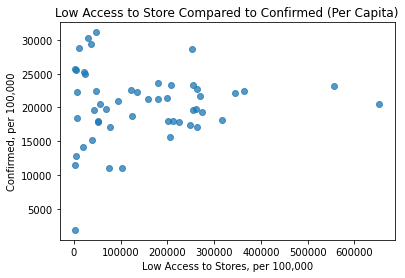

In [836]:
scatter_pc_confirmed_la = create_scatter(comb_pc_all_df['confirmed_per_100000'], comb_pc_all_df['Low Access to Store (Per Capita)'], 'Low Access to Store Compared to Confirmed (Per Capita)', 'Low Access to Stores, per 100,000', 'Confirmed, per 100,000', 0.75)

r-squared: nan


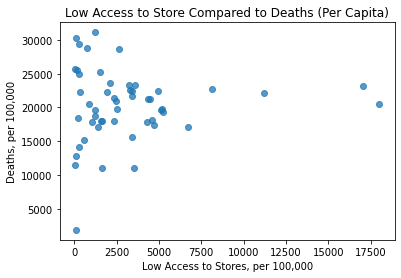

In [837]:
scatter_pc_deaths_la = create_scatter(comb_pc_all_df['deaths_per_100000'], comb_pc_all_df['Low Access to Store (Per Capita)'], 'Low Access to Store Compared to Deaths (Per Capita)', 'Low Access to Stores, per 100,000', 'Deaths, per 100,000', 0.75)

r-squared: nan


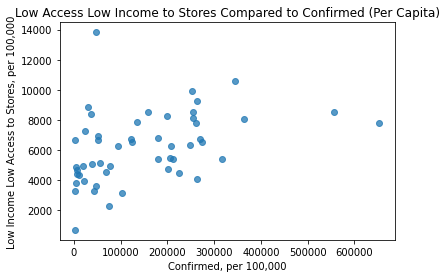

In [838]:
scatter_pc_confirmed_lilw = create_scatter(comb_pc_all_df['confirmed_per_100000'], comb_pc_all_df['Low Access Low Income to Store (Per Capita)'], 'Low Access Low Income to Stores Compared to Confirmed (Per Capita)', 'Confirmed, per 100,000', 'Low Income Low Access to Stores, per 100,000', 0.75)

r-squared: nan


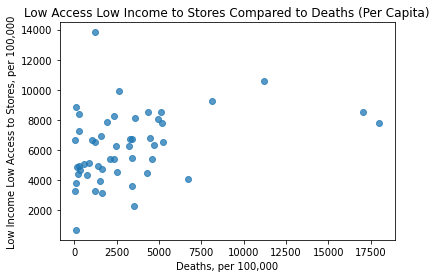

In [839]:
scatter_pc_deaths_lilw = create_scatter(comb_pc_all_df['deaths_per_100000'], comb_pc_all_df['Low Access Low Income to Store (Per Capita)'], 'Low Access Low Income to Stores Compared to Deaths (Per Capita)', 'Deaths, per 100,000', 'Low Income Low Access to Stores, per 100,000', 0.75)

r-squared: nan


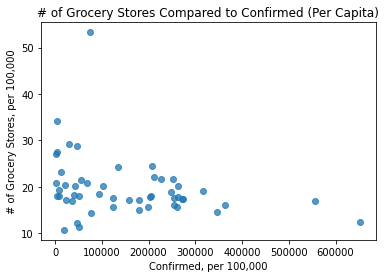

In [840]:
scatter_pc_confirmed_grocery = create_scatter(comb_pc_all_df['confirmed_per_100000'], comb_pc_all_df['# of Grocery Stores (Per Capita)'], '# of Grocery Stores Compared to Confirmed (Per Capita)', 'Confirmed, per 100,000', '# of Grocery Stores, per 100,000', 0.75)

r-squared: nan


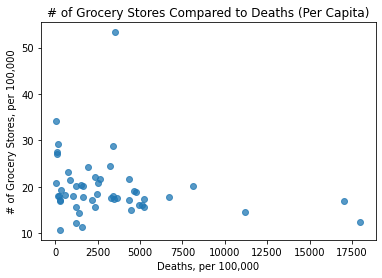

In [841]:
scatter_pc_deaths_grocery = create_scatter(comb_pc_all_df['deaths_per_100000'], comb_pc_all_df['# of Grocery Stores (Per Capita)'], '# of Grocery Stores Compared to Deaths (Per Capita)', 'Deaths, per 100,000', '# of Grocery Stores, per 100,000', 0.75)

r-squared: nan


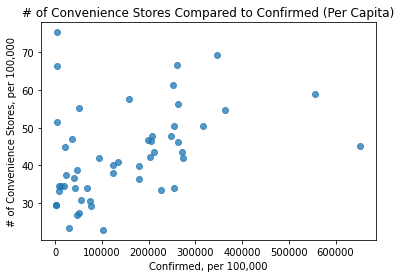

In [842]:
scatter_pc_confirmed_convenience = create_scatter(comb_pc_all_df['confirmed_per_100000'], comb_pc_all_df['# of Convenience Stores (Per Capita)'], '# of Convenience Stores Compared to Confirmed (Per Capita)', 'Confirmed, per 100,000', '# of Convenience Stores, per 100,000', 0.75)

r-squared: nan


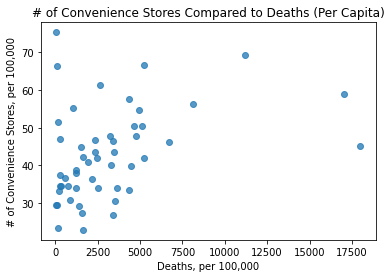

In [843]:
scatter_pc_deaths_convenience = create_scatter(comb_pc_all_df['deaths_per_100000'], comb_pc_all_df['# of Convenience Stores (Per Capita)'], '# of Convenience Stores Compared to Deaths (Per Capita)', 'Deaths, per 100,000', '# of Convenience Stores, per 100,000', 0.75)

r-squared: nan


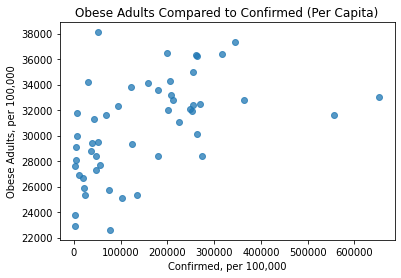

In [844]:
scatter_pc_confirmed_obese = create_scatter(comb_pc_all_df['confirmed_per_100000'], comb_pc_all_df['Obese Adults (Per Capita)'], 'Obese Adults Compared to Confirmed (Per Capita)', 'Confirmed, per 100,000', 'Obese Adults, per 100,000', 0.75)

r-squared: nan


<function matplotlib.pyplot.savefig(*args, **kwargs)>

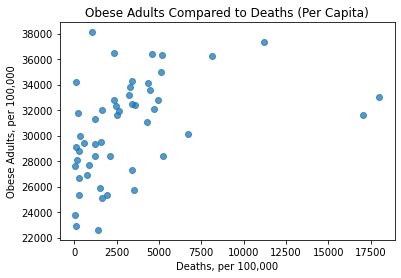

In [845]:
scatter_pc_deaths_obese = create_scatter(comb_pc_all_df['deaths_per_100000'], comb_pc_all_df['Obese Adults (Per Capita)'], 'Obese Adults Compared to Deaths (Per Capita)', 'Deaths, per 100,000', 'Obese Adults, per 100,000', 0.75)
plt.savefig

In [846]:
comb_pc_conf_dfc1 = comb_pc_all_df.sort_values(['confirmed_per_100000'], ascending=False)
comb_pc_conf_dfc1.head()

,total_population,confirmed_per_100000,deaths_per_100000,Low Access to Store (Per Capita),Low Access Low Income to Store (Per Capita),# of Grocery Stores (Per Capita),# of Convenience Stores (Per Capita),Obese Adults (Per Capita)
state,,,,,,,,
Texas,"27,885,195.00","653,218.96","18,003.33","20,537.53","7,819.27",12.40,45.26,"33,000.00"
Georgia,"10,297,484.00","556,697.15","17,050.05","23,139.25","8,508.86",17.04,58.86,"31,600.00"
Tennessee,"6,651,089.00","364,099.28","4,918.28","22,433.58","8,072.36",16.12,54.71,"32,800.00"
Mississippi,"2,988,762.00","345,514.24","11,194.21","22,067.41","10,582.85",14.62,69.23,"37,300.00"
Iowa,"3,132,499.00","316,247.39","4,614.24","18,074.59","5,426.09",19.12,50.50,"36,400.00"


In [847]:
comb_pc_conf_dfc1 = comb_pc_all_df.sort_values(['confirmed_per_100000'], ascending=False)
bar_pc_df= comb_pc_conf_dfc1.iloc[0:5,1]
bar_pc_df

state
Texas         653,218.96
Georgia       556,697.15
Tennessee     364,099.28
Mississippi   345,514.24
Iowa          316,247.39
Name: confirmed_per_100000, dtype: float64

Text(0, 0.5, 'Confirmed (per capita)')

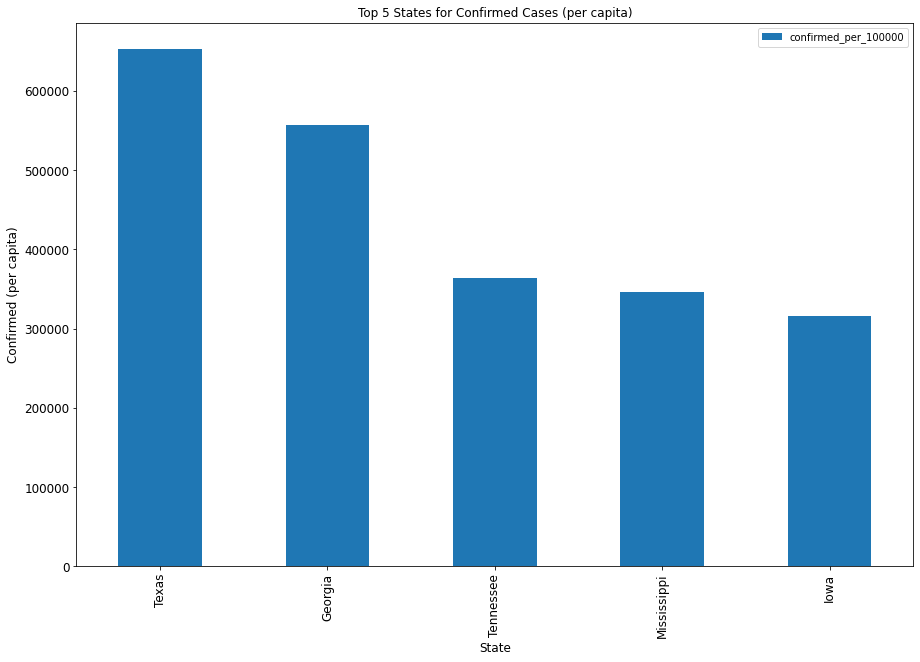

In [848]:
# top 5 states for confirmed

ax = bar_pc_df.plot(kind='bar', title ="Top 5 States for Confirmed Cases (per capita)",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("State",fontsize=12)
ax.set_ylabel("Confirmed (per capita)",fontsize=12)

In [849]:
comb_pc_deaths_dfc1 = comb_pc_all_df.sort_values(by=['deaths_per_100000'], ascending=False)
bar_pc2_df= comb_pc_deaths_dfc1.iloc[0:5,2]
bar_pc2_df

state
Texas         18,003.33
Georgia       17,050.05
Mississippi   11,194.21
Louisiana      8,125.76
Virginia       6,713.41
Name: deaths_per_100000, dtype: float64

Text(0, 0.5, 'Confirmed (per capita)')

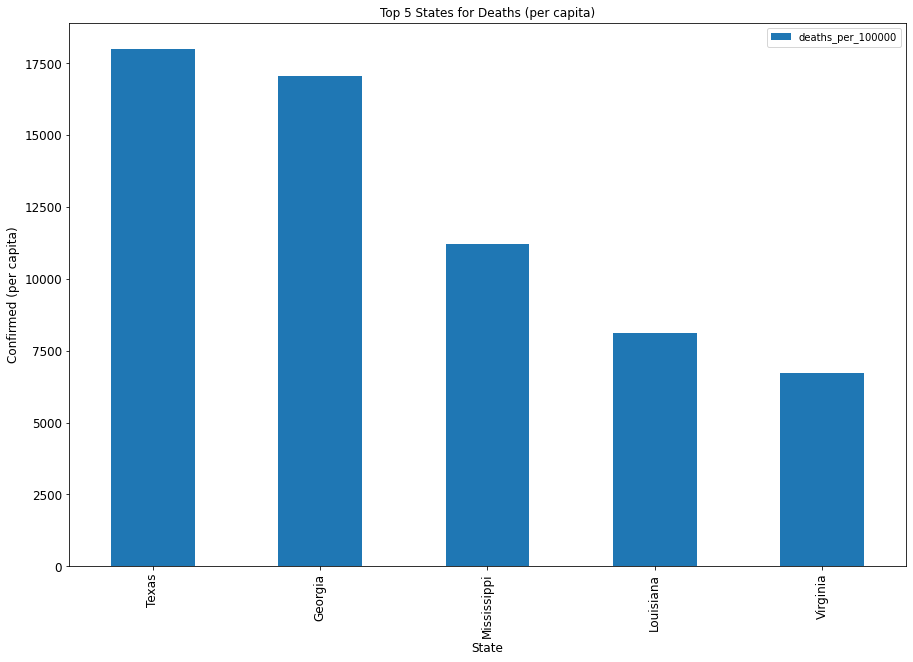

In [850]:
# top 5 states for deaths

ax = bar_pc2_df.plot(kind='bar', title ="Top 5 States for Deaths (per capita)",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("State",fontsize=12)
ax.set_ylabel("Confirmed (per capita)",fontsize=12)

Text(0, 0.5, 'Confirmed (per capita)')

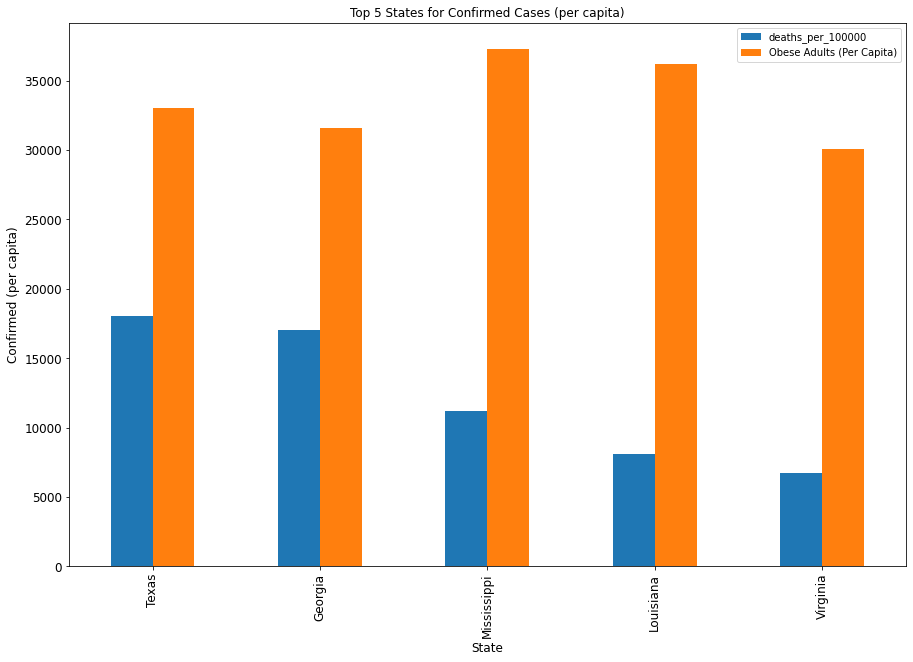

In [851]:
# most obese states vs deaths 

bar_pc3_df= comb_pc_deaths_dfc1.iloc[0:5,[2,7]]

ax = bar_pc3_df.plot(kind='bar', title ="Top 5 States for Confirmed Cases (per capita)",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("State",fontsize=12)
ax.set_ylabel("Confirmed (per capita)",fontsize=12)

Text(0, 0.5, 'Confirmed (per capita)')

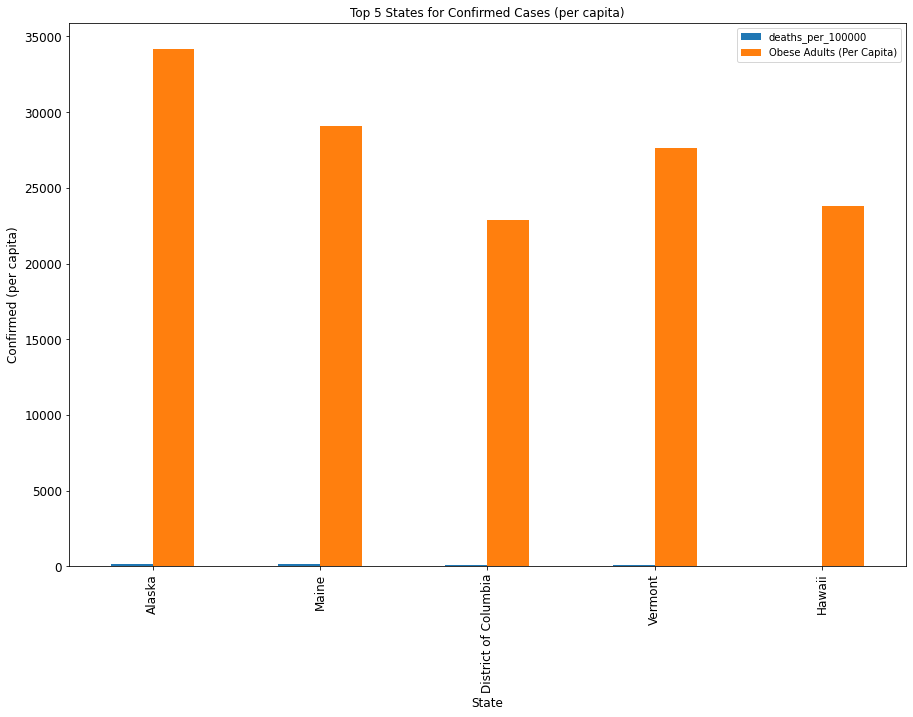

In [852]:
bar_pc3_df= comb_pc_deaths_dfc1.iloc[46:51,[2,7]]

ax = bar_pc3_df.plot(kind='bar', title ="Top 5 States for Confirmed Cases (per capita)",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("State",fontsize=12)
ax.set_ylabel("Confirmed (per capita)",fontsize=12)

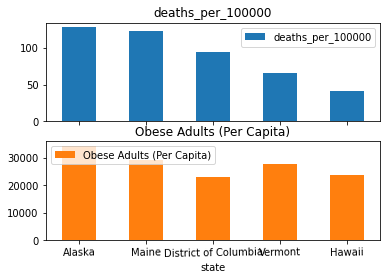

In [853]:
axes = bar_pc3_df.plot.bar(rot=1, subplots=True)
axes[1].legend(loc=2)  

In [ ]:
# Question 1: How does each variable related to food deserts or obesity nationwide when converted into per capita statistics?
# Conclusion: Again, each variable tends to have a positive correlation to the confirmed cases and deaths across the USA. Without the r-squared value, I am unable to see exactly how the variables correlate to each other and if they relate closely. Overall, I feel as if I was unable to come to a firm conclusion for the per capita stats. Given time, I do think there will be a general positive correlation between the variables.
# What's next?: Due to time constraints, I wasn't able to see my idea to its full potential. Given more time, I would want to compare confirmed cases and deaths to convenience store locations around the nation and in specific states (top 5, bottom 5 for confirmed cases/deaths) using a heatmap or similar visual. I believe this would prove fruitful as it would give an indication has to what populations are contracting / dying from COVID-19 at a higher rate and their general location in relation to convenience stores or grocery stores.